# Redes Neuronales - Dataset Idealista Madrid

En esta practica vamos a ver cómo crear un modelo de **redes neuronales** para poder predecir el valor de una vivienda, teniendo en cuenta datos de la página *Idealista* en Madrid.

## Paso 1: Descargar el dataset

Primeramente, vamos a descargar este dataset desde la página de *Kaggle*, para poder trabajar con él. El enlace es el siguiente

[Dataset](https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings)

In [1025]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanchana1990/madrid-idealista-property-listings")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alumno_AI\.cache\kagglehub\datasets\kanchana1990\madrid-idealista-property-listings\versions\1


In [1026]:
import pandas as pd
import os

# List files in the directory to find CSV files
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
print("Available CSV files:", csv_files)

# Assuming there's a main CSV file we want to read
# If there are multiple files, you may need to select the specific one you want
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Loaded {csv_files[0]}")
    print(f"Shape: {df.shape}")
    display(df.head())
else:
    print("No CSV files found in the directory.")

Available CSV files: ['idealista_madrid.csv']
Loaded idealista_madrid.csv
Shape: (915, 13)


,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


## Paso 2: Visualización de los datos

In [1027]:
# Ver los valores mínimos y máximos de cada variable
print(df[['price', 'baths', 'rooms', 'sqft']].describe())



              price       baths       rooms         sqft
count  9.150000e+02  915.000000  915.000000   915.000000
mean   1.290575e+06    2.900546    3.474317   217.238251
std    1.036640e+06    1.626487    1.594625   191.745826
min    1.220000e+05    1.000000    0.000000    14.000000
25%    6.250000e+05    2.000000    2.000000   104.000000
50%    9.900000e+05    3.000000    3.000000   158.000000
75%    1.650000e+06    4.000000    4.000000   264.000000
max    8.900000e+06   12.000000   12.000000  1768.000000


## Paso 3: Limpieza de los datos

In [1028]:
df = df[['baths', 'rooms', 'address', 'sqft', 'typology', 'price']]

df['neighborhood'] = df['address'].str.split(',').str[0]
df = df.drop(columns=['address'])

df.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3,3,183,Pisos,1920000,Recoletos
1,3,3,170,Pisos,1995000,Castellana
2,3,4,270,Pisos,1300000,Hortaleza
3,3,3,248,Pisos,1650000,Chamartín
4,3,3,116,Pisos,1590750,Recoletos


In [1029]:
# Verificar valores nulos
print("Valores nulos en el dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Valores nulos en el dataset:
Series([], dtype: int64)


In [1030]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_18188\2915125772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_18188\2915125772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')


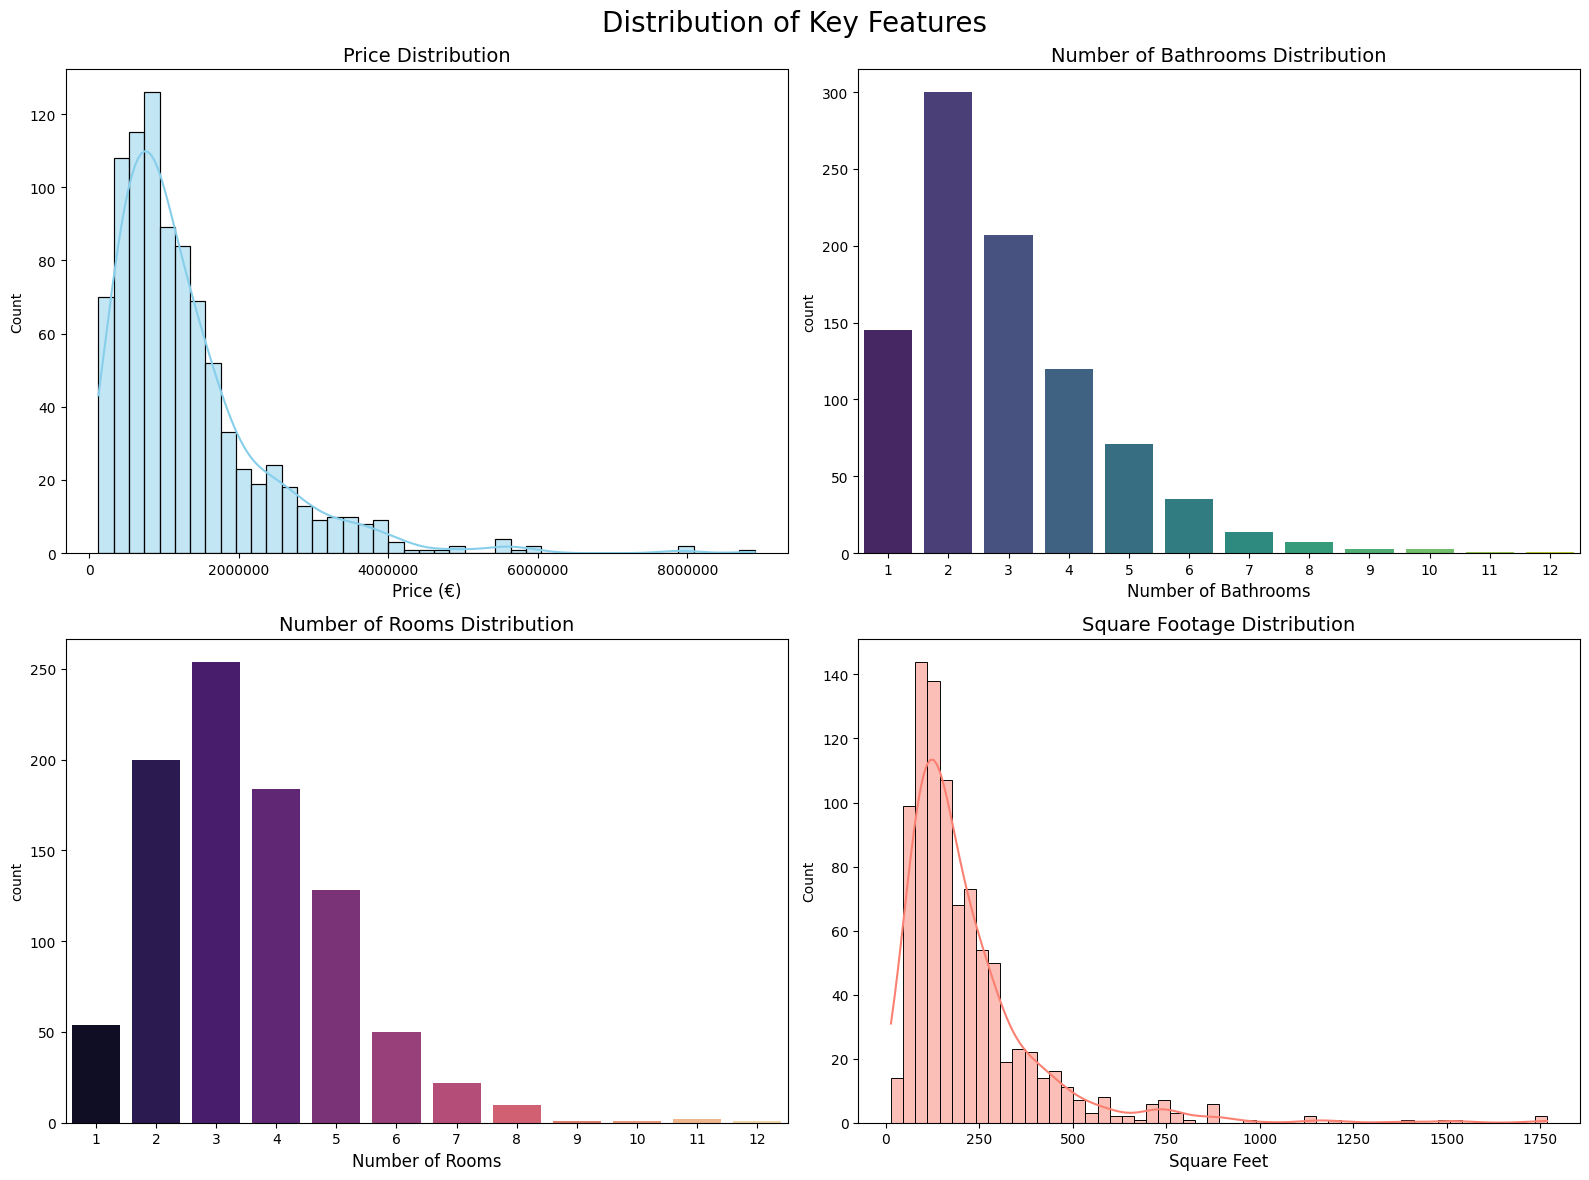

In [1031]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Features', fontsize=20, y=0.98)

# Plot price distribution
sns.histplot(df['price'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Plot baths distribution
sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bathrooms', fontsize=12)

# Plot rooms distribution
sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Rooms', fontsize=12)

# Plot sqft distribution
sns.histplot(df['sqft'], kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_xlabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

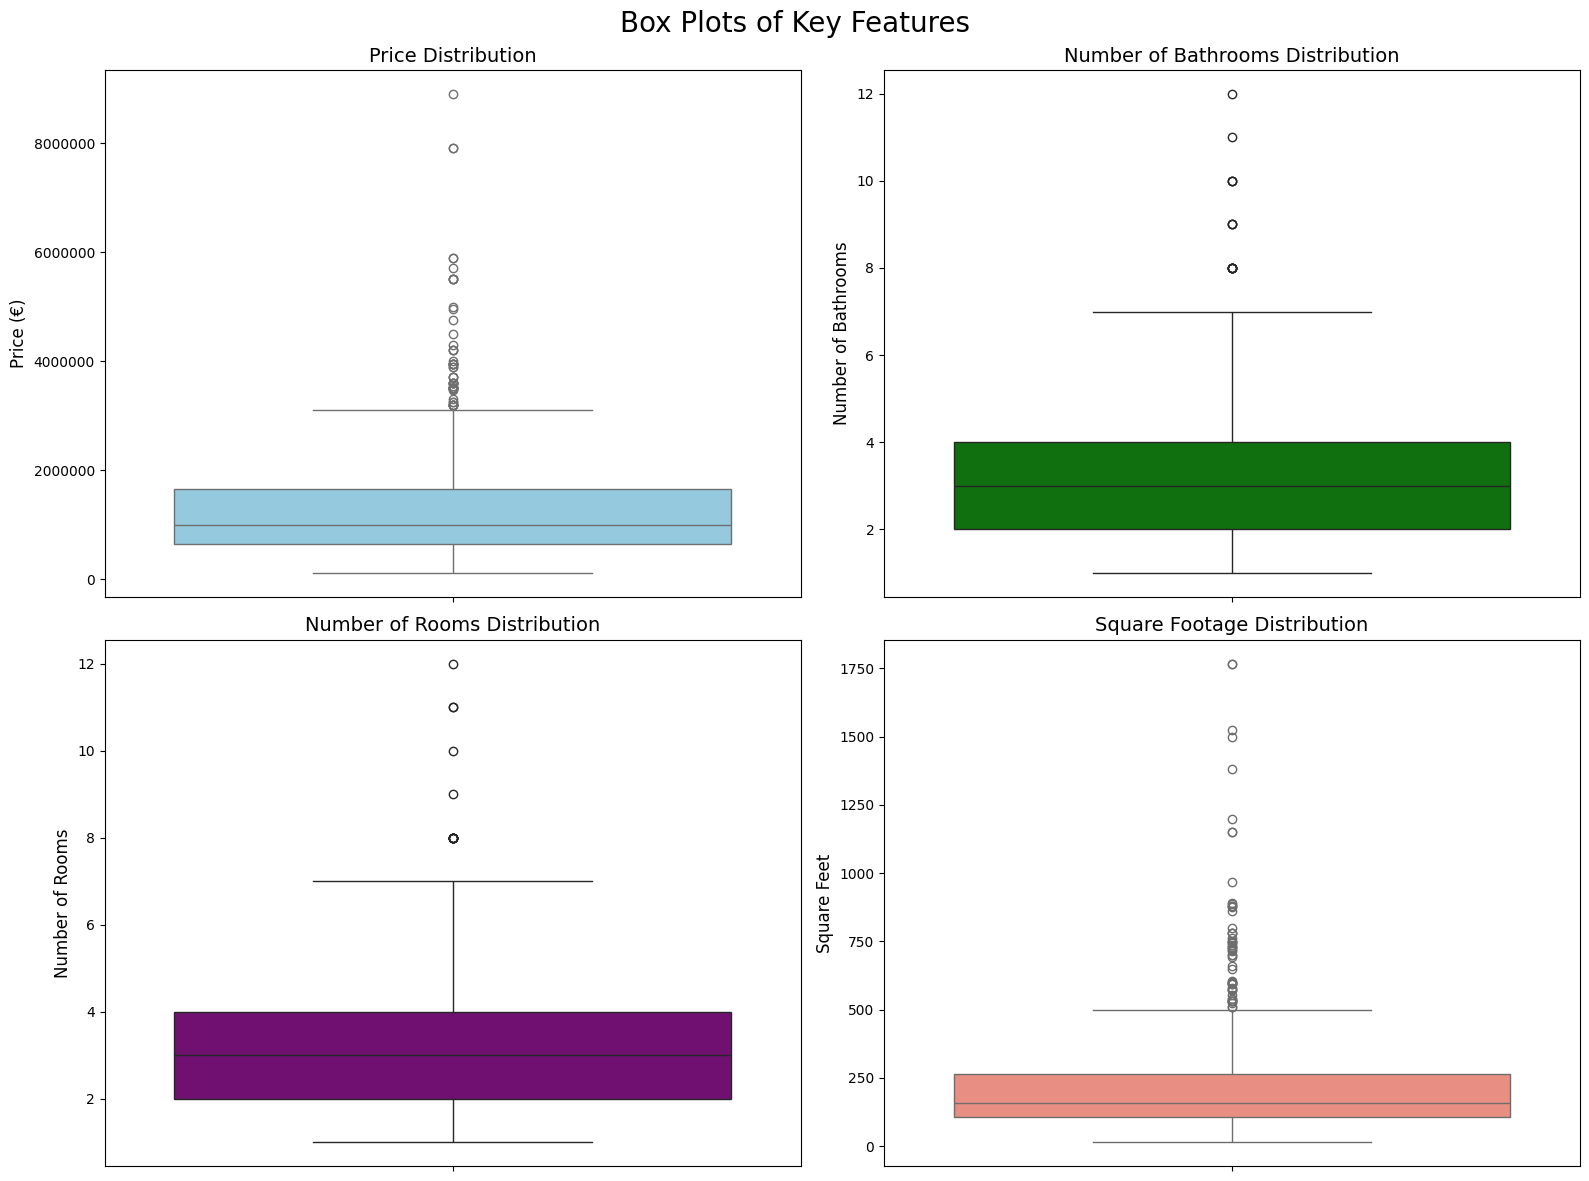

In [1032]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots of Key Features', fontsize=20, y=0.98)

# Plot price box plot
sns.boxplot(y=df['price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_ylabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot baths box plot
sns.boxplot(y=df['baths'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_ylabel('Number of Bathrooms', fontsize=12)

# Plot rooms box plot
sns.boxplot(y=df['rooms'], ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_ylabel('Number of Rooms', fontsize=12)

# Plot sqft box plot
sns.boxplot(y=df['sqft'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_ylabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [1033]:
# from sklearn.ensemble import IsolationForest

# # Seleccionar columnas numéricas
# numerical_cols = ['price', 'baths', 'rooms', 'sqft']

# # Crear y ajustar el modelo
# iso_forest = IsolationForest(contamination=0.05, random_state=42)
# outlier_pred = iso_forest.fit_predict(df[numerical_cols])

# # Filtrar el DataFrame para mantener solo los datos normales (predicción == 1)
# df = df[outlier_pred == 1]

# # Mostrar las primeras filas del DataFrame limpio
# print("DataFrame limpio:")
# print(f"Shape: {df.shape}")

Una vez hemos visualizado los datos, vamos a pensar en cuáles de todos estos datos nos son verdaderamente útiles. Esta determinación viene principalmente con el pensamiento crítico de entender qué es lo realmente importante a la hora de crear y entrenar el modelo, por lo que, desde mi punto de vista estos son los campos clave:

- `price`

- `baths`

- `rooms`

- `address`

- `sqft`

- `typology`

Entre ellos, tenemos que entender que el campo `price` es el campo a predecir, por lo tanto lo asignaremos como `label` y el resto como `features`

In [1034]:
features = df.drop('price', axis=1).copy()

label = df['price'].copy()

print("Features shape:", features.shape)
print("Label shape:", label.shape)

Features shape: (907, 5)
Label shape: (907,)


In [1035]:
features.head()

,baths,rooms,sqft,typology,neighborhood
0,3,3,183,Pisos,Recoletos
1,3,3,170,Pisos,Castellana
2,3,4,270,Pisos,Hortaleza
3,3,3,248,Pisos,Chamartín
4,3,3,116,Pisos,Recoletos


In [1036]:
unique_neighborhoods = features['neighborhood'].nunique()
neighborhood_counts = features['neighborhood'].value_counts()

# Print summary
print(f"Total number of distinct neighborhoods: {unique_neighborhoods}")
print("\nNeighborhood distribution:")
print(neighborhood_counts)

Total number of distinct neighborhoods: 104

Neighborhood distribution:
neighborhood
Barrio de Salamanca           63
Hortaleza                     60
Chamartín                     54
Moncloa                       48
Centro                        47
                              ..
Casco Histórico de Barajas     1
El Plantío                     1
Arganzuela                     1
Canillejas                     1
San Juan Bautista              1
Name: count, Length: 104, dtype: int64


## Generación de datos sintéticos

## Feature engineering

In [1037]:
import numpy as np

# Feature Engineering

def feature_engineering(x):
    """
    Realiza ingeniería de características en el DataFrame dado.
    """
    # Crear una copia del DataFrame original
    features = x.copy()
    # 2. Room to bathroom ratio
    features['room_bath_ratio'] = df['rooms'] / df['baths']

    # 3. Space per room
    features['sqft_per_room'] = df['sqft'] / df['rooms']

    # 4. Total rooms (bathrooms + bedrooms)
    features['total_rooms'] = df['rooms'] + df['baths']

    # 5. Is luxury property (based on percentiles)
    price_threshold = np.percentile(df['price'], 75)
    size_threshold = np.percentile(df['sqft'], 75)
    features['is_luxury'] = ((df['rooms'] > price_threshold) & 
                             (df['baths'] > price_threshold) &
                            (df['sqft'] > size_threshold)).astype(int)

    # 6. Neighborhood statistics
    neighborhood_avg = df.groupby('neighborhood')['price'].mean().to_dict()
    neighborhood_median = df.groupby('neighborhood')['price'].median().to_dict()
    features['neighborhood_price_avg'] = df['neighborhood'].map(neighborhood_avg)
    features['neighborhood_price_median'] = df['neighborhood'].map(neighborhood_median)

    # 7. Price relative to neighborhood
    features['price_to_neighborhood_ratio'] = df['price'] / features['neighborhood_price_avg']

    # 8. Square footage bins
    features['sqft_bin'] = pd.qcut(df['sqft'], 5, labels=False)

    # 9. Room density (rooms per 100 sqft)
    features['room_density'] = (df['rooms'] / df['sqft']) * 100

    features["log_sqft"] = np.log1p(df["sqft"])

    features["log_neighborhood_price_median"] = np.log1p(features["neighborhood_price_median"])

    features["log_neighborhood_price_avg"] = np.log1p(features["neighborhood_price_avg"])

    features = pd.get_dummies(features, columns=["typology"], prefix="typology")

    features = pd.get_dummies(features, columns=['sqft_bin'], prefix='sqft_bin')

    features = features.drop(columns=['neighborhood'])

    return features

features = feature_engineering(features)
# Display new features
print(f"Features shape after engineering: {features.shape}")
features.head()

Features shape after engineering: (907, 21)


,baths,rooms,sqft,room_bath_ratio,sqft_per_room,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,price_to_neighborhood_ratio,...,log_sqft,log_neighborhood_price_median,log_neighborhood_price_avg,typology_Independientes,typology_Pisos,sqft_bin_0,sqft_bin_1,sqft_bin_2,sqft_bin_3,sqft_bin_4
0,3,3,183,1.000000,61.000000,6,0,2.661438e+06,1750000.0,0.721415,...,5.214936,14.375127,14.794377,False,True,False,False,True,False,False
1,3,3,170,1.000000,56.666667,6,0,2.316056e+06,1675000.0,0.861378,...,5.141664,14.331324,14.655377,False,True,False,False,True,False,False
2,3,4,270,1.333333,67.500000,7,0,1.719650e+06,1564000.0,0.755968,...,5.602119,14.262758,14.357632,False,True,False,False,False,True,False
3,3,3,248,1.000000,82.666667,6,0,1.797870e+06,1650000.0,0.917752,...,5.517453,14.316286,14.402114,False,True,False,False,False,True,False
4,3,3,116,1.000000,38.666667,6,0,2.661438e+06,1750000.0,0.597703,...,4.762174,14.375127,14.794377,False,True,False,True,False,False,False


## Normalizando los datos

In [1038]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

columns_to_normalize = [
    # Original numerical features
    'rooms', 'baths', 'sqft',
    
    # Price-related features
    'neighborhood_price_avg', 'neighborhood_price_median',
    
    # Ratio features
    'room_bath_ratio', 'sqft_per_room', 'price_to_neighborhood_ratio', 'room_density',

    # log values
    'log_sqft', "log_neighborhood_price_median", "log_neighborhood_price_avg",
    
    # Count features
    'total_rooms'
]

features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])


features.head()

,baths,rooms,sqft,room_bath_ratio,sqft_per_room,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,price_to_neighborhood_ratio,...,log_sqft,log_neighborhood_price_median,log_neighborhood_price_avg,typology_Independientes,typology_Pisos,sqft_bin_0,sqft_bin_1,sqft_bin_2,sqft_bin_3,sqft_bin_4
0,0.0,0.0,0.150943,-0.400000,0.280292,0.00,0,1.700722,1.070348,-0.319210,...,0.152530,0.851191,1.187653,False,True,False,False,True,False,False
1,0.0,0.0,0.069182,-0.400000,0.128467,0.00,0,1.294698,0.956884,-0.083180,...,0.072564,0.779212,0.977179,False,True,False,False,True,False,False
2,0.0,0.5,0.698113,0.266667,0.508029,0.25,0,0.593577,0.788956,-0.260941,...,0.575085,0.666541,0.526335,False,True,False,False,False,True,False
3,0.0,0.0,0.559748,-0.400000,1.039416,0.00,0,0.685531,0.919062,0.011888,...,0.482684,0.754501,0.593690,False,True,False,False,False,True,False
4,0.0,0.0,-0.270440,-0.400000,-0.502190,0.00,0,1.700722,1.070348,-0.527833,...,-0.341595,0.851191,1.187653,False,True,False,True,False,False,False


In [1039]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler_price = MinMaxScaler()

# Normalizar la columna 'price'
prices = np.log1p(df['price'])

label_scaled = scaler_price.fit_transform(prices.values.reshape(-1, 1))


# Al final tendrás el vector normalizado de precios
print(label_scaled[:5]) 

[[0.64246964]
 [0.65140223]
 [0.551565  ]
 [0.60714151]
 [0.59861667]]


In [1040]:
# # Create a copy of the features dataframe to avoid modifying the original
# features_corr = features.copy()

# columns_to_print = [col for col in features.columns]


# # Combine numeric features with encoded categorical features
# correlation_df = pd.concat([
#     features_corr[columns_to_print],
#     label
# ], axis=1)

# # Calculate correlation matrix
# correlation_matrix = correlation_df.corr()

# # Create heatmap visualization
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, 
#             annot=True, 
#             cmap='coolwarm', 
#             fmt='.2f',
#             linewidths=0.2)
# plt.title('Correlation Matrix: Features vs. Price', fontsize=16)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()

# # Print correlations with price (sorted)
# price_correlations = correlation_matrix['price'].sort_values(ascending=False)
# print("Feature correlations with price (sorted):")
# print(price_correlations)

In [1041]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
import tensorflow.keras as keras

In [1042]:
print("features shape:", features.shape)
print("label_scaled shape:", label_scaled.shape)

features shape: (907, 21)
label_scaled shape: (907, 1)


In [1043]:
# from sklearn.model_selection import train_test_split

# _, X_test, _, y_test = train_test_split(features, label_scaled, test_size=0.2, random_state=42)

In [1044]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# def generate_synthetic_real_estate_data(n_samples, df=df):
#     """
#     Genera datos sintéticos inmobiliarios realistas incluyendo precios
#     """
#     # 1. Analizar distribuciones originales
#     neighborhoods = df['neighborhood'].unique()
#     neighborhood_weights = df['neighborhood'].value_counts(normalize=True)
    
#     # Extraer valores únicos y probabilidades para typology
#     typology_values = ["Pisos", "Independientes"]
#     pisos_prob = (df['typology'] == "Pisos").mean()
    
#     # 2. Analizar correlaciones entre variables numéricas
#     numeric_cols = ['rooms', 'baths', 'sqft', 'price']
#     corr_matrix = df[numeric_cols].corr()
#     means = df[numeric_cols].mean().values
#     stds = df[numeric_cols].std().values
    
#     # 3. Generar datos correlacionados
#     cov = np.outer(stds, stds) * corr_matrix.values
#     chol = np.linalg.cholesky(cov)
    
#     uncorrelated = np.random.normal(size=(n_samples, len(numeric_cols)))
#     correlated = np.dot(uncorrelated, chol.T) + means
    
#     # 4. Crear DataFrame sintético
#     synthetic_data = pd.DataFrame()
    
#     # 5. Poblar con datos numéricos y asegurar restricciones realistas
#     synthetic_data['rooms'] = np.maximum(1, np.round(correlated[:, 0])).astype(int)
#     synthetic_data['baths'] = np.maximum(1, np.round(correlated[:, 1])).astype(int)  
#     synthetic_data['sqft'] = np.maximum(25, np.round(correlated[:, 2])).astype(int)
#     synthetic_data['price'] = np.maximum(50000, np.round(correlated[:, 3]/1000)*1000)  # Redondear a miles
    
#     # 6. Generar datos categóricos
#     synthetic_data['typology'] = np.random.choice(
#         typology_values, 
#         size=n_samples, 
#         p=[pisos_prob, 1-pisos_prob]
#     )
    
#     synthetic_data['neighborhood'] = np.random.choice(
#         neighborhoods, 
#         size=n_samples, 
#         p=neighborhood_weights
#     )
    
#     # 7. Añadir restricciones de sentido común
#     # Asegurar que apartamentos grandes tengan suficientes habitaciones
#     for i in range(len(synthetic_data)):
#         if synthetic_data.loc[i, 'sqft'] > 300 and synthetic_data.loc[i, 'rooms'] < 3:
#             synthetic_data.loc[i, 'rooms'] = np.random.randint(3, 6)
        
#         # Los baños nunca deben exceder el número de habitaciones + 1
#         if synthetic_data.loc[i, 'baths'] > synthetic_data.loc[i, 'rooms'] + 1:
#             synthetic_data.loc[i, 'baths'] = synthetic_data.loc[i, 'rooms'] if np.random.random() > 0.5 else synthetic_data.loc[i, 'rooms']
        
#         # Ajustar precio para casos extremos
#         if synthetic_data.loc[i, 'price'] < 100000 and synthetic_data.loc[i, 'sqft'] > 150:
#             synthetic_data.loc[i, 'price'] = np.random.randint(100000, 200000)
        
#         # Typology Independientes tiende a ser más caro
#         if synthetic_data.loc[i, 'typology'] == "Independientes" and synthetic_data.loc[i, 'price'] < df[df['typology'] == "Independientes"]['price'].median():
#             synthetic_data.loc[i, 'price'] *= 1.2
    
#     return synthetic_data

# # Generar datos sintéticos
# synthetic_df = generate_synthetic_real_estate_data(1500)

# # Mostrar los primeros registros
# print("Datos inmobiliarios sintéticos:")
# display(synthetic_df.head(10))

# df = pd.concat([df, synthetic_df], ignore_index=True)

# df.shape

In [1045]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_scaled, test_size=0.2, random_state=42)

In [1046]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="swish"),
    Dropout(0.2),
    Dense(32, activation="swish"),
    Dropout(0.2),
    Dense(1, activation="linear")
])

# Compilamos el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0015), 
              loss="mse", 
              metrics=["mae"])

In [1047]:
model.fit(
    X_train, 
    y_train,
    epochs=300,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1506 - mae: 0.3229 - val_loss: 0.0354 - val_mae: 0.1525
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0786 - mae: 0.1909 - val_loss: 0.0132 - val_mae: 0.0863
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0523 - mae: 0.1562 - val_loss: 0.0132 - val_mae: 0.0888
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0448 - mae: 0.1481 - val_loss: 0.0063 - val_mae: 0.0605
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - mae: 0.1269 - val_loss: 0.0055 - val_mae: 0.0581
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260 - mae: 0.1221 - val_loss: 0.0057 - val_mae: 0.0597
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0220 - mae: 0.1163 - val_loss: 0.0037 - val_mae: 0.0469
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - mae: 0.1009 - val_loss: 0.0049 - val_mae: 0.0570
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.02

In [1048]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Convert predictions back to original scale

y_pred_original = np.expm1(scaler_price.inverse_transform(y_pred))
y_test_original = np.expm1(scaler_price.inverse_transform(y_test))

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

average_price = np.mean(y_test_original)

rmse_treshold = (rmse / average_price) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE threshold: {rmse_treshold:.2f}%")
print(f"R^2: {r2:.2f}")
print(f"Average price: {average_price:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE: 88754.22
RMSE threshold: 6.76%
R^2: 0.99
Average price: 1312704.95


In [1049]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9198e-04 - mae: 0.0101 


[0.00015998283925000578, 0.00942186824977398]

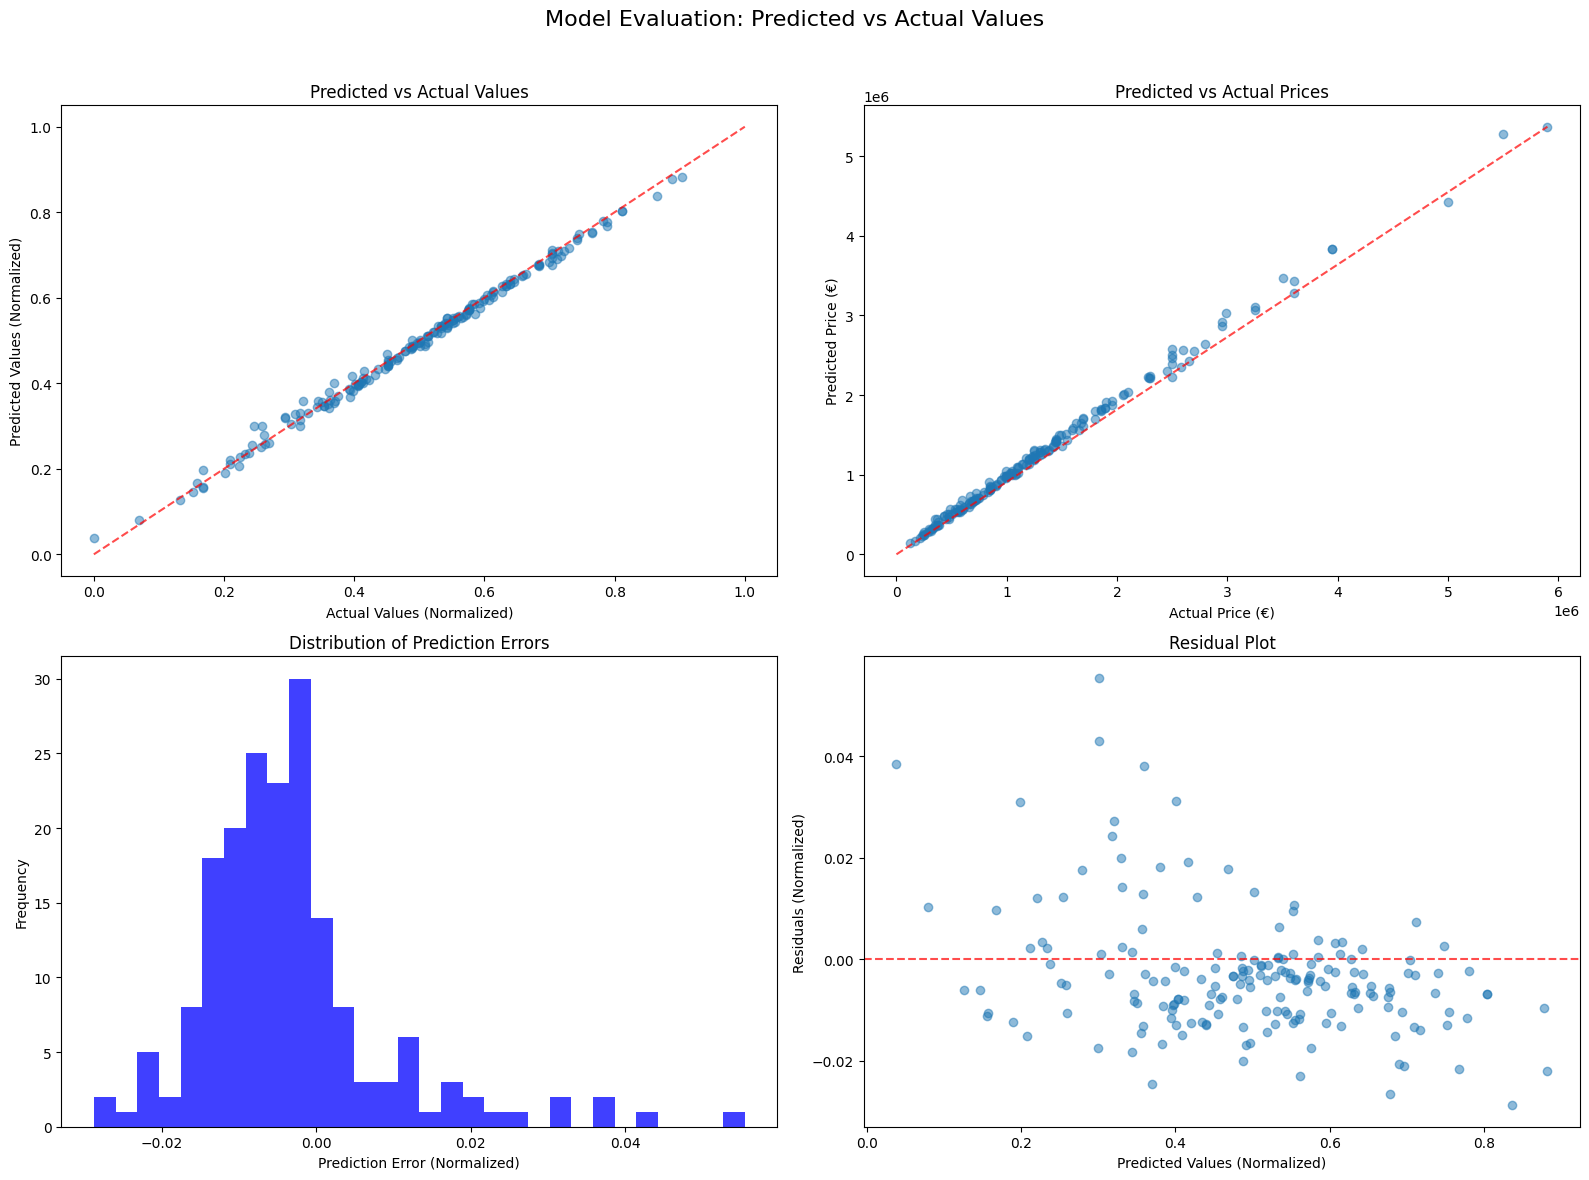

Error Statistics:
Mean Error: -0.0033626952651367227
Standard Deviation of Error: 0.012193241520068504
Max Overestimation: 0.05544975717855394
Max Underestimation: -0.028753482645465844


In [1050]:
# Visualize model predictions vs actual values

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Evaluation: Predicted vs Actual Values', fontsize=16)

# 1. Scatter plot of predicted vs actual values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.7)  # Diagonal line representing perfect predictions
axes[0, 0].set_xlabel('Actual Values (Normalized)')
axes[0, 0].set_ylabel('Predicted Values (Normalized)')
axes[0, 0].set_title('Predicted vs Actual Values')

# 2. Scatter plot with original price values (not normalized)
axes[0, 1].scatter(np.expm1(scaler_price.inverse_transform(y_test)), np.expm1(scaler_price.inverse_transform(y_pred)), alpha=0.5)
axes[0, 1].plot([0, max(np.expm1(scaler_price.inverse_transform(y_test)))[0]], [0, max(np.expm1(scaler_price.inverse_transform(y_pred)))[0]], 'r--', alpha=0.7) 
axes[0, 1].set_xlabel('Actual Price (€)')
axes[0, 1].set_ylabel('Predicted Price (€)')
axes[0, 1].set_title('Predicted vs Actual Prices')

# 3. Histogram of errors
errors = y_pred - y_test
axes[1, 0].hist(errors, bins=30, alpha=0.75, color='blue')
axes[1, 0].set_xlabel('Prediction Error (Normalized)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')

# 4. Residual plot
axes[1, 1].scatter(y_pred, errors, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Predicted Values (Normalized)')
axes[1, 1].set_ylabel('Residuals (Normalized)')
axes[1, 1].set_title('Residual Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print summary statistics of errors
print("Error Statistics:")
print(f"Mean Error: {np.mean(errors)}")
print(f"Standard Deviation of Error: {np.std(errors)}")
print(f"Max Overestimation: {np.max(errors)}")
print(f"Max Underestimation: {np.min(errors)}")

In [1055]:
# Select one example from the test set
example_idx = 54  # You can change this to any index in the test set

# Get the features for this example and reshape for prediction
example_features = X_test[example_idx:example_idx+1]

# Make prediction using the trained model
example_pred = model.predict(example_features)

# Convert both prediction and actual value back to original scale
example_pred_orig = np.expm1(scaler_price.inverse_transform(example_pred))
example_actual_orig = np.expm1(scaler_price.inverse_transform(y_test[example_idx:example_idx+1]))

# Print the results
print(f"Example #{example_idx}:")
print(f"Predicted price: €{example_pred_orig[0][0]:,.2f}")
print(f"Actual price:    €{example_actual_orig[0][0]:,.2f}")
print(f"Difference:      €{example_actual_orig[0][0] - example_pred_orig[0][0]:,.2f}")
print(f"Error (%):       {((example_actual_orig[0][0] - example_pred_orig[0][0]) / example_actual_orig[0][0] * 100):,.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Example #54:
Predicted price: €1,305,803.38
Actual price:    €1,300,000.00
Difference:      €-5,803.38
Error (%):       -0.45%


In [1053]:
import os
import tensorflow as tf
from datetime import datetime

# Create a models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"real_estate_price_predictor_{timestamp}"
model_path = os.path.join('models', model_name)

# Save in both SavedModel format and h5 format
model.save(f"{model_path}.keras") 


print(f"Model saved to {model_path}")

Model saved to models\real_estate_price_predictor_20250321_115623
